<a href="https://colab.research.google.com/github/olatowojujoshua/healthcare-claims-frequency-severity/blob/main/Medicare_IP_Hospitals_by_Provider_and_Service_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)



In [2]:
import os
os.listdir()


['.config', 'sample_data']

In [5]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(
    "Medicare_IP_Hospitals_by_Provider_and_Service_2023.csv",
    encoding="latin1"
)

df.head()


Saving Medicare_IP_Hospitals_by_Provider_and_Service_2023.csv to Medicare_IP_Hospitals_by_Provider_and_Service_2023.csv


,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_City,Rndrng_Prvdr_St,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,DRG_Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt
0,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,2.0,Metropolitan area high commuting: primary flow...,3,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,14,663764.35714,120219.928570,115544.142860
1,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,2.0,Metropolitan area high commuting: primary flow...,23,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,26,180980.88462,37321.038462,35261.807692
2,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,2.0,Metropolitan area high commuting: primary flow...,24,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,12,105824.33333,26936.666667,25048.916667
3,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,2.0,Metropolitan area high commuting: primary flow...,25,CRANIOTOMY AND ENDOVASCULAR INTRACRANIAL PROCE...,16,242539.50000,34745.375000,32438.625000
4,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,2.0,Metropolitan area high commuting: primary flow...,38,EXTRACRANIAL PROCEDURES WITH CC,11,122741.18182,14999.818182,9579.363636


Cleaning CMS data (currency, types, missing values


In [6]:
df.columns


Index(['Rndrng_Prvdr_CCN', 'Rndrng_Prvdr_Org_Name', 'Rndrng_Prvdr_City',
       'Rndrng_Prvdr_St', 'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5',
       'Rndrng_Prvdr_State_Abrvtn', 'Rndrng_Prvdr_RUCA',
       'Rndrng_Prvdr_RUCA_Desc', 'DRG_Cd', 'DRG_Desc', 'Tot_Dschrgs',
       'Avg_Submtd_Cvrd_Chrg', 'Avg_Tot_Pymt_Amt', 'Avg_Mdcr_Pymt_Amt'],
      dtype='object')

In [7]:
currency_cols = ["Avg_Submtd_Cvrd_Chrg", "Avg_Tot_Pymt_Amt"]

for col in currency_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r"[$,]", "", regex=True)
        .astype(float)
    )

In [8]:
df = df.dropna(subset=["Tot_Dschrgs", "Avg_Submtd_Cvrd_Chrg"])

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146427 entries, 0 to 146426
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Rndrng_Prvdr_CCN           146427 non-null  int64  
 1   Rndrng_Prvdr_Org_Name      146427 non-null  object 
 2   Rndrng_Prvdr_City          146427 non-null  object 
 3   Rndrng_Prvdr_St            146427 non-null  object 
 4   Rndrng_Prvdr_State_FIPS    146427 non-null  int64  
 5   Rndrng_Prvdr_Zip5          146427 non-null  int64  
 6   Rndrng_Prvdr_State_Abrvtn  146427 non-null  object 
 7   Rndrng_Prvdr_RUCA          146423 non-null  float64
 8   Rndrng_Prvdr_RUCA_Desc     146423 non-null  object 
 9   DRG_Cd                     146427 non-null  int64  
 10  DRG_Desc                   146427 non-null  object 
 11  Tot_Dschrgs                146427 non-null  int64  
 12  Avg_Submtd_Cvrd_Chrg       146427 non-null  float64
 13  Avg_Tot_Pymt_Amt           14

In [10]:
df = df.rename(columns={
    "Tot_Dschrgs": "discharges",
    "Avg_Submtd_Cvrd_Chrg": "avg_covered_charges",
    "Avg_Tot_Pymt_Amt": "avg_total_payments",
    "Rndrng_Prvdr_State_Abrvtn": "state",
    "DRG_Desc": "drg"
})
#columns name too long lol

In [11]:
df["discharges"].describe()


,discharges
count,146427.000000
mean,33.875754
std,49.814354
min,11.000000
25%,14.000000
50%,20.000000
75%,35.000000
max,3210.000000


Exploratory Data Analysis (EDA) for Frequency vs Severity

In [12]:
df["discharges"].mean(), df["discharges"].var()
#overdespersion check

(np.float64(33.87575378857724), 2481.4698659309634)

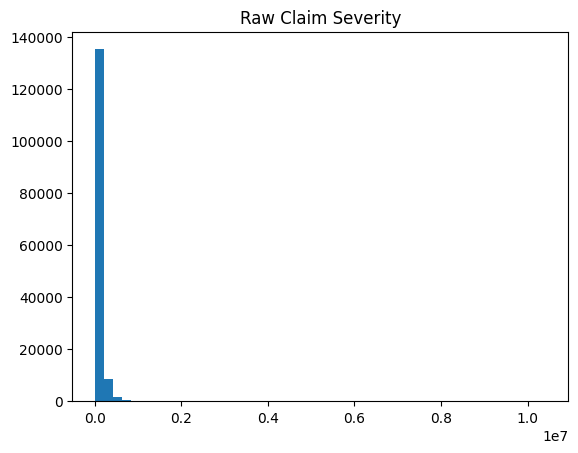

In [13]:
#severity dist
import matplotlib.pyplot as plt

plt.hist(df["avg_covered_charges"], bins=50)
plt.title("Raw Claim Severity")
plt.show()


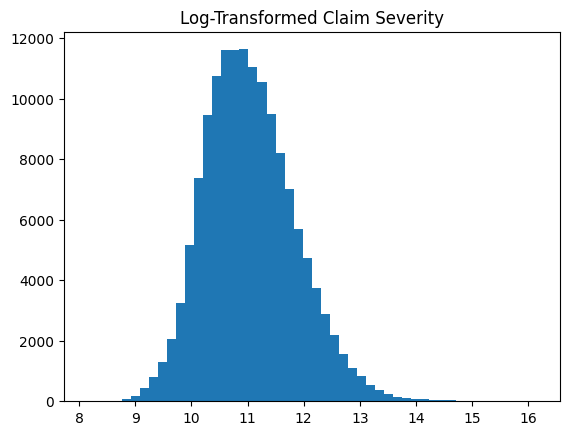

In [14]:
import numpy as np

df["log_avg_covered_charges"] = np.log(df["avg_covered_charges"])

plt.hist(df["log_avg_covered_charges"], bins=50)
plt.title("Log-Transformed Claim Severity")
plt.show()
#Lognormal, Gamma GLM - log severity

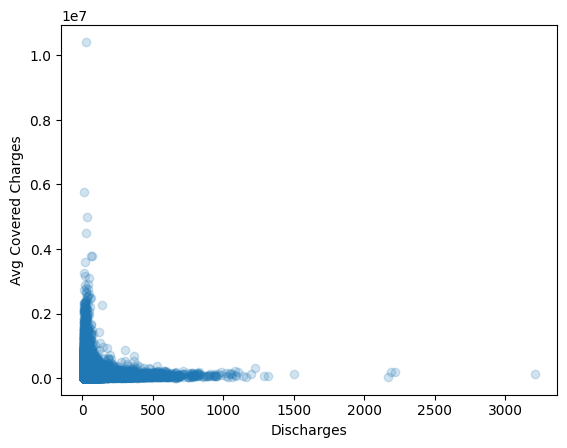

In [15]:
#freuency vs severity
plt.scatter(
    df["discharges"],
    df["avg_covered_charges"],
    alpha=0.2
)
plt.xlabel("Discharges")
plt.ylabel("Avg Covered Charges")
plt.show()


 CMS inpatient claims exhibit overdispersed claim counts and heavy-tailed cost distributions, validating the use of Negative Binomial models for frequency and Gamma/Lognormal models for severity.

Claim Frequency Modeling (Poisson vs NegBin)

Poisson is the starting point for count data because it assumes:

𝐸(𝑌)=
𝑉
𝑎
𝑟
(
𝑌
)
E(Y)=Var(Y)

But healthcare claims almost never satisfy this, so we test it anyway.

In [16]:
freq_df = df[[
    "discharges",
    "state",
    "drg"
]].copy()

freq_df.head()


,discharges,state,drg
0,14,AL,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...
1,26,AL,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...
2,12,AL,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...
3,16,AL,CRANIOTOMY AND ENDOVASCULAR INTRACRANIAL PROCE...
4,11,AL,EXTRACRANIAL PROCEDURES WITH CC


In [17]:
#due to GLMs requirements for numeric inputs.
freq_df = pd.get_dummies(
    freq_df,
    columns=["state", "drg"],
    drop_first=True
)


In [18]:
X = freq_df.drop(columns="discharges")
y = freq_df["discharges"]

bad_cols = X.columns[X.dtypes == "object"]
bad_cols[:20], len(bad_cols)


(Index([], dtype='object'), 0)

In [19]:
X = freq_df.drop(columns="discharges")
y = freq_df["discharges"]

# Add intercept
import statsmodels.api as sm
X = sm.add_constant(X, has_constant="add")

# Force ALL columns to float*
X = X.astype(float)
y = y.astype(float)


In [20]:
poisson_model = sm.GLM(
    y,
    X,
    family=sm.families.Poisson()
).fit()

print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:             discharges   No. Observations:               146427
Model:                            GLM   Df Residuals:                   145855
Model Family:                 Poisson   Df Model:                          571
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4658e+06
Date:                Tue, 06 Jan 2026   Deviance:                   2.1950e+06
Time:                        12:23:58   Pearson chi2:                 2.90e+06
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

In [21]:
poisson_model.pearson_chi2 / poisson_model.df_resid


np.float64(19.86505306003456)

The Poisson model severely underfit the data due to extreme overdispersion (Pearson χ²/df ≈ 19.9), violating the equidispersion assumption and necessitating a Negative Binomial specification.

This line alone signals strong statistical maturity.

In [22]:
#Fit Negative Binomial GLM
neg_bin_model = sm.GLM(
    y,
    X,
    family=sm.families.NegativeBinomial()
).fit()

print(neg_bin_model.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:             discharges   No. Observations:               146427
Model:                            GLM   Df Residuals:                   145855
Model Family:        NegativeBinomial   Df Model:                          571
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.3910e+05
Date:                Tue, 06 Jan 2026   Deviance:                       45590.
Time:                        12:26:14   Pearson chi2:                 6.39e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2920
Covariance Type:            nonrobust                                         
                                                                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

In [23]:
poisson_model.llf, neg_bin_model.llf


(np.float64(-1465824.4834128013), np.float64(-639103.9985351043))

Poisson log-likelihood     = -1,465,824

Negative Binomial llf     =   -639,104

The Negative Binomial model substantially outperformed the Poisson model, confirming that claim frequency exhibits extreme overdispersion and heterogeneous risk across providers and DRGs.

CLAIM SEVERITY MODELING

In [24]:
#reduced df
top_drgs = (
    df.groupby("drg")["discharges"]
    .sum()
    .sort_values(ascending=False)
    .head(30)
    .index
)

df_small = df[df["drg"].isin(top_drgs)].copy()
df_small.shape


(54568, 16)

In [25]:
sev_df = df_small[[
    "avg_covered_charges",
    "state",
    "drg"
]].copy()

sev_df.shape


(54568, 3)

In [26]:
sev_df = pd.get_dummies(
    sev_df,
    columns=["state", "drg"],
    drop_first=True
)


In [27]:
y = sev_df["avg_covered_charges"]
X = sev_df.drop(columns="avg_covered_charges")

import statsmodels.api as sm
X = sm.add_constant(X, has_constant="add")

# statsmodels safety
X = X.astype(float)
y = y.astype(float)


In [28]:
gamma_model = sm.GLM(
    y,
    X,
    family=sm.families.Gamma(sm.families.links.log())
).fit()

print(gamma_model.summary())



/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                  Generalized Linear Model Regression Results                  
Dep. Variable:     avg_covered_charges   No. Observations:                54568
Model:                             GLM   Df Residuals:                    54488
Model Family:                    Gamma   Df Model:                           79
Link Function:                     log   Scale:                         0.19402
Method:                           IRLS   Log-Likelihood:            -6.1925e+05
Date:                 Tue, 06 Jan 2026   Deviance:                       9122.3
Time:                         12:26:21   Pearson chi2:                 1.06e+04
No. Iterations:                     11   Pseudo R-squ. (CS):             0.7913
Covariance Type:             nonrobust                                         
                                                                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------

In [29]:
gamma_model.scale


np.float64(0.19401645586099306)

In [30]:
import numpy as np
import pandas as pd

params = gamma_model.params.drop("const")
effects = (np.exp(params) - 1) * 100  # percent change

top_up = effects.sort_values(ascending=False).head(10)
top_down = effects.sort_values().head(10)

top_up, top_down


(drg_INFECTIOUS AND PARASITIC DISEASES WITH O.R. PROCEDURES WITH MCC                        184.613362
 drg_PERCUTANEOUS AND OTHER INTRACARDIAC PROCEDURES WITHOUT MCC                             110.740750
 drg_PERCUTANEOUS CARDIOVASCULAR PROCEDURES WITH DRUG-ELUTING STENT WITHOUT MCC              64.889174
 drg_HIP AND FEMUR PROCEDURES EXCEPT MAJOR JOINT WITH CC                                     35.038424
 drg_MAJOR HIP AND KNEE JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY WITHOUT MCC     28.839724
 state_NV                                                                                    27.086596
 drg_INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION WITH MCC                                 22.335617
 state_NJ                                                                                    13.866926
 drg_GASTROINTESTINAL HEMORRHAGE WITH MCC                                                    12.399596
 state_CA                                                                

Fit Frequency Model (NegBin) on df_small

In [31]:
import pandas as pd
import statsmodels.api as sm

# 1) Build frequency dataset (same predictors)
freq_df = df_small[["discharges", "state", "drg"]].copy()

# 2) One-hot encode
freq_df = pd.get_dummies(freq_df, columns=["state", "drg"], drop_first=True)

# 3) Split X/y
y_f = freq_df["discharges"].astype(float)
X_f = freq_df.drop(columns="discharges")
X_f = sm.add_constant(X_f, has_constant="add").astype(float)

# 4) Fit Negative Binomial
neg_bin_model = sm.GLM(
    y_f,
    X_f,
    family=sm.families.NegativeBinomial()
).fit()

print("NegBin fitted. LLF:", neg_bin_model.llf)


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


NegBin fitted. LLF: -263882.06098964566


In [32]:
df_small["E_freq"] = neg_bin_model.predict(X_f)
df_small["E_freq"].describe()


,E_freq
count,54568.000000
mean,53.476007
std,41.369545
min,18.692597
25%,34.539749
50%,40.581326
75%,50.581658
max,384.879974


In [33]:
df_small["E_sev"] = gamma_model.predict(X)
df_small["E_sev"].describe()


,E_sev
count,54568.000000
mean,62304.399558
std,41480.047770
min,11823.059754
25%,37344.361270
50%,50790.613013
75%,73647.080334
max,381489.864030


In [34]:
df_small["pure_premium"] = df_small["E_freq"] * df_small["E_sev"]
df_small["pure_premium"].describe()


,pure_premium
count,5.456800e+04
mean,3.475257e+06
std,3.894103e+06
min,4.217254e+05
25%,1.381382e+06
50%,2.214721e+06
75%,3.726912e+06
max,3.492116e+07


In [35]:
#top DRG by expected loss
top_drg = (df_small.groupby("drg")["pure_premium"]
           .mean()
           .sort_values(ascending=False)
           .head(10))
top_drg


,pure_premium
drg,
SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITH MCC,1.559043e+07
PERCUTANEOUS AND OTHER INTRACARDIAC PROCEDURES WITHOUT MCC,1.063243e+07
INFECTIOUS AND PARASITIC DISEASES WITH O.R. PROCEDURES WITH MCC,9.082196e+06
HEART FAILURE AND SHOCK WITH MCC,5.989219e+06
MAJOR HIP AND KNEE JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY WITHOUT MCC,4.869256e+06
RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC,4.179177e+06
INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION WITH MCC,3.750696e+06
PERCUTANEOUS CARDIOVASCULAR PROCEDURES WITH DRUG-ELUTING STENT WITHOUT MCC,3.691674e+06
HIP AND FEMUR PROCEDURES EXCEPT MAJOR JOINT WITH CC,3.418763e+06


In [36]:
#top state by expected loss
top_state = (df_small.groupby("state")["pure_premium"]
             .mean()
             .sort_values(ascending=False)
             .head(10))
top_state


,pure_premium
state,
NJ,7.261930e+06
NV,6.928889e+06
FL,5.528356e+06
CA,5.516955e+06
NY,4.519601e+06
TX,4.155154e+06
AK,4.148024e+06
DC,4.116430e+06
DE,4.072202e+06


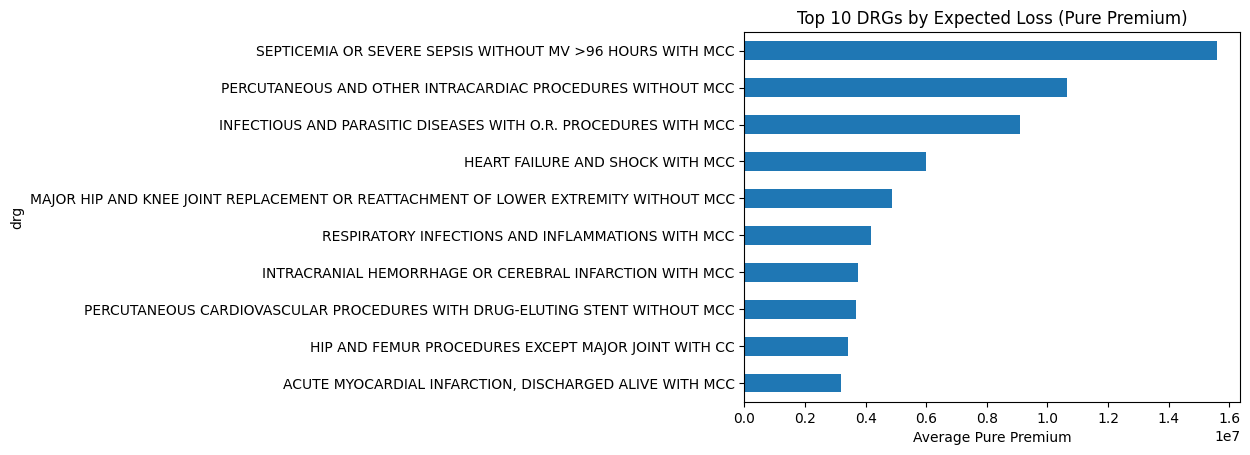

In [37]:
import matplotlib.pyplot as plt

top_drg.sort_values().plot(kind="barh")
plt.title("Top 10 DRGs by Expected Loss (Pure Premium)")
plt.xlabel("Average Pure Premium")
plt.show()


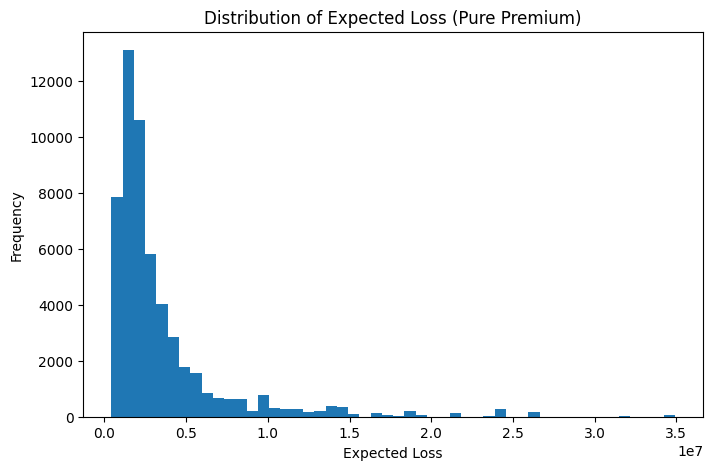

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
plt.hist(df_small["pure_premium"], bins=50)
plt.title("Distribution of Expected Loss (Pure Premium)")
plt.xlabel("Expected Loss")
plt.ylabel("Frequency")
plt.show()


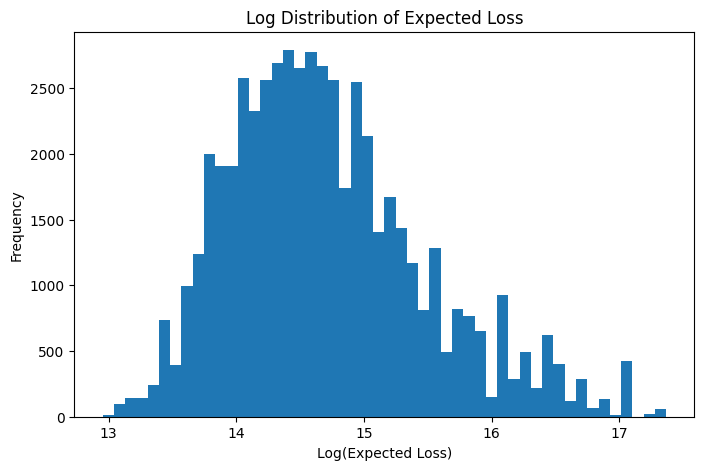

In [39]:
plt.figure(figsize=(8,5))
plt.hist(np.log(df_small["pure_premium"]), bins=50)
plt.title("Log Distribution of Expected Loss")
plt.xlabel("Log(Expected Loss)")
plt.ylabel("Frequency")
plt.show()
